In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

anscombe = sns.load_dataset('anscombe')

dataset1 = anscombe[anscombe.dataset == 'I']
dataset2 = anscombe[anscombe.dataset == 'II']
dataset3 = anscombe[anscombe.dataset == 'III']
dataset4 = anscombe[anscombe.dataset == 'IV']


<function matplotlib.pyplot.show>

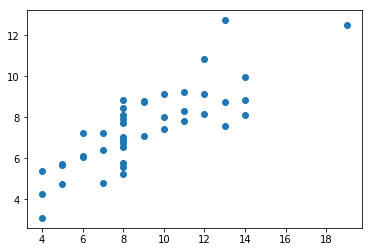

In [13]:
plt.plot(anscombe.x, anscombe.y, 'o')
plt.show

Text(0.5,0.98,'Anscombe Data')

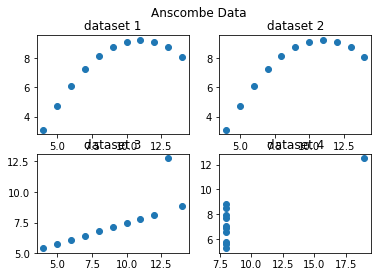

In [18]:
fig = plt.figure()
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

axes1.plot(dataset1.x, dataset2.y, 'o')
axes2.plot(dataset2.x, dataset2.y, 'o')
axes3.plot(dataset3.x, dataset3.y, 'o')
axes4.plot(dataset4.x, dataset4.y, 'o')

axes1.set_title('dataset 1')
axes2.set_title('dataset 2')
axes3.set_title('dataset 3')
axes4.set_title('dataset 4')

fig.suptitle('Anscombe Data')



In [21]:
tips = sns.load_dataset('tips')
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


Text(0,0.5,'Frequency')

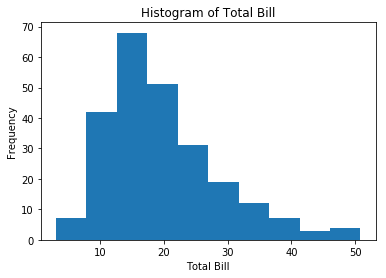

In [29]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(tips['total_bill'], bins = 10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Frequency')
#fig.show() # Not needed in a Notebook - throws a warning

Text(0,0.5,'Tips')

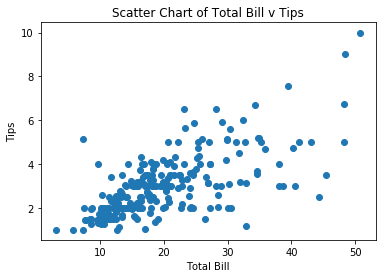

In [31]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title("Scatter Chart of Total Bill v Tips")
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tips')


/home/rnslucas/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0,0.5,'Tip')

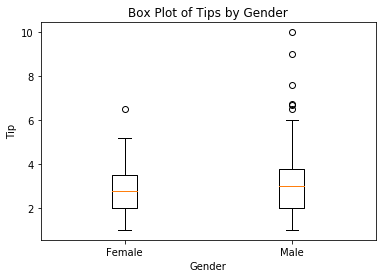

In [34]:
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)
axes1.boxplot([tips[tips['sex'] == 'Female']['tip'], 
               tips[tips['sex'] == 'Male']['tip']],
              labels = ['Female', 'Male'])
axes1.set_title('Box Plot of Tips by Gender')
axes1.set_xlabel('Gender')
axes1.set_ylabel('Tip')


In [50]:
# Scatter plot using recode to add an extra column to the Tips dataframe
# to reflect 'sex' as a 0 or 1
# Then plot the data, resizing the point to indicate the size of tip.
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1
    
tips['sex_color'] = tips['sex'].apply(recode_sex)

print(tips.head())




   total_bill   tip     sex smoker  day    time  size sex_color
0       16.99  1.01  Female     No  Sun  Dinner     2         0
1       10.34  1.66    Male     No  Sun  Dinner     3         1
2       21.01  3.50    Male     No  Sun  Dinner     3         1
3       23.68  3.31    Male     No  Sun  Dinner     2         1
4       24.59  3.61  Female     No  Sun  Dinner     4         0


Text(0,0.5,'Tip')

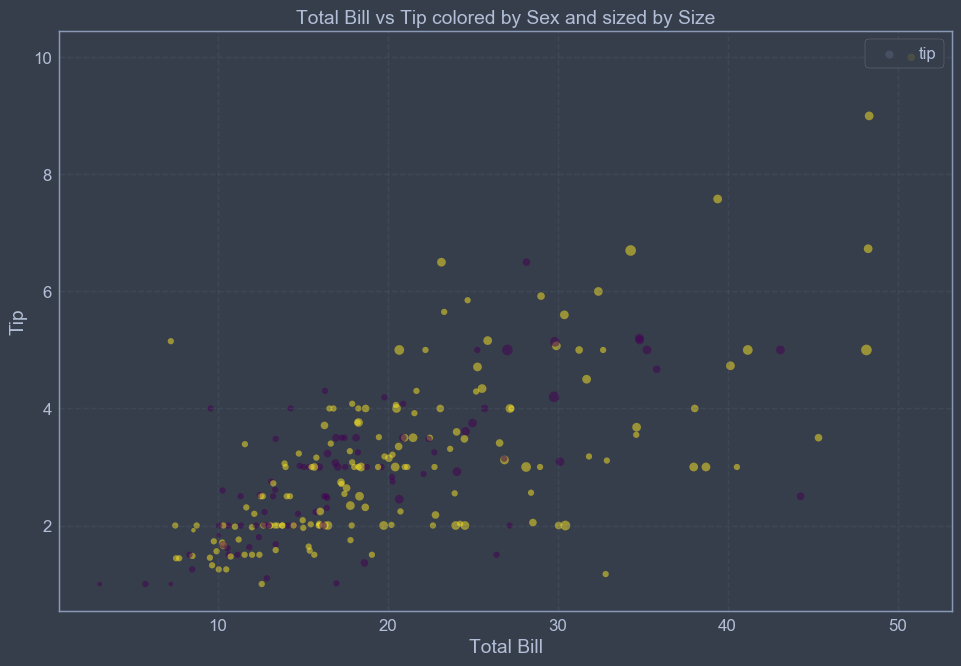

In [62]:
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

scatter_plot = plt.figure(figsize=(12, 8), dpi=96 )
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(x=tips['total_bill'], y=tips['tip'], s=tips['size'] * 10, 
             c=tips['sex_color'],
             alpha=0.5, )
axes1.grid(axis='both', linestyle='dashed', alpha=0.25)
axes1.legend(loc='upper right')
axes1.set_title("Total Bill vs Tip colored by Sex and sized by Size")
axes1.set_xlabel("Total Bill")
axes1.set_ylabel("Tip")

Text(0.5,0,'Total Bill')

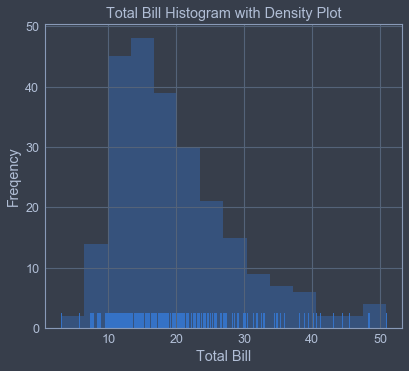

In [69]:
#  Using Seaborn plots.
# Seaborn is built on top of Matplotlib so it is possible to interact directly
# with that Library
hist = sns.distplot(tips['total_bill'], kde=False, rug=True)
hist.set_title('Total Bill Histogram with Density Plot')
hist.set_ylabel('Freqency')
hist.set_xlabel('Total Bill')

Text(0,0.5,'Frequency')

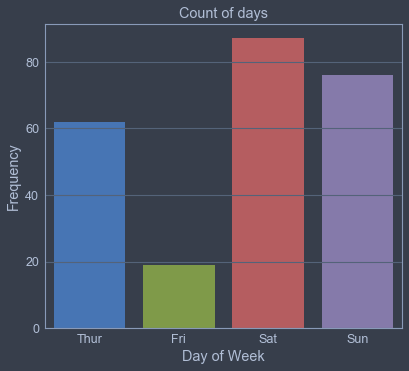

In [70]:
# Seaborn 'bar'or 'count' plot
count = sns.countplot('day', data=tips)
count.set_title('Count of days')
count.set_xlabel('Day of Week')
count.set_ylabel('Frequency')

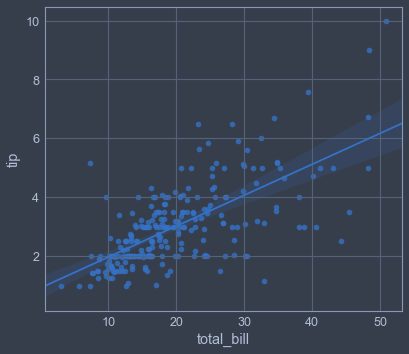

In [71]:
# Scatter plot
# Seaborn add a regression line to the scatter plot (hence the name 'regplot')
# This way of creating a scatter plot creates a Matplot 'Axes' object
# so could be included in a Matplot Figure as another axes.

scatter = sns.regplot(x='total_bill', y='tip', data=tips)


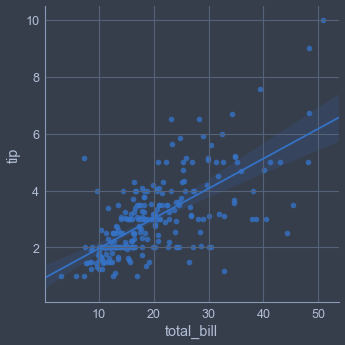

In [72]:
# Scatter plot using lmplot (another way)
# This way of creating a scatter plot creates a Matplot 'Figure' object
# but uses the 'regplot' method under the hood.
fig = sns.lmplot(x='total_bill', y='tip', data=tips)



Text(0.5,0.98,'Joint plot of Total Bill and Tip')

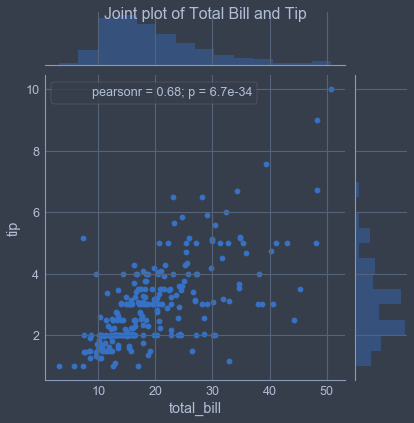

In [73]:
scatter = sns.jointplot(x='total_bill', y='tip', data=tips)
scatter.fig.suptitle('Joint plot of Total Bill and Tip')